In [1]:
# Load TensorBoard notebook extension
%load_ext tensorboard

Run ``tfds build --overwrite`` under lfw_pairs directory first.

# Imports

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt

from deepface import DeepFace

2024-01-30 21:01:46.446821: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-30 21:01:46.484727: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 21:01:46.484747: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 21:01:46.485728: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-30 21:01:46.491975: I tensorflow/core/platform/cpu_feature_guar

In [3]:
LOG_DIR = './logs/' + datetime.now().strftime("%Y%m%d-%H%M%S")
FILE_WRITER = tf.summary.create_file_writer(LOG_DIR)


2024-01-30 21:01:49.280725: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-30 21:01:49.316667: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-30 21:01:49.318112: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

# Dataset

In [4]:
ds, info = tfds.load('lfw_pairs',
                      with_info=True,
                      download=True,
                      as_supervised=False)

In [5]:
bench_ds = ds['train'].batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
tfds.benchmark(bench_ds, batch_size=32)


************ Summary ************



  0%|          | 0/69 [00:00<?, ?it/s]

Examples/sec (First included) 5867.25 ex/sec (total: 2240 ex, 0.38 sec)
Examples/sec (First only) 537.19 ex/sec (total: 32 ex, 0.06 sec)
Examples/sec (First excluded) 6852.66 ex/sec (total: 2208 ex, 0.32 sec)


,duration,num_examples,avg
first+lasts,0.381780,2240,5867.248889
first,0.059570,32,537.186618
lasts,0.322211,2208,6852.659303


In [6]:
with FILE_WRITER.as_default():
    tmp = np.array([x['img_0'] for x in ds['train'].take(25).as_numpy_iterator()])
    tf.summary.image("Pair 0", tmp, max_outputs=25, step=0)
    tmp = np.array([x['img_1'] for x in ds['train'].take(25).as_numpy_iterator()])
    tf.summary.image("Pair 1", tmp, max_outputs=25, step=0)

2024-01-30 21:01:50.194184: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [7]:
info.features

FeaturesDict({
    'img_0': Image(shape=(250, 250, 3), dtype=uint8),
    'img_1': Image(shape=(250, 250, 3), dtype=uint8),
    'pair': ClassLabel(shape=(), dtype=int64, num_classes=2),
})

In [8]:
info

tfds.core.DatasetInfo(
    name='lfw_pairs',
    full_name='lfw_pairs/0.1.0',
    description="""
    TODO(lfw_pairs): Markdown description of that will appear on the catalog page.
    Description is **formatted** as markdown.
    
    It should also contain any processing which has been applied (if any),
    (e.g. corrupted example skipped, images cropped,...):
    """,
    homepage='http://vis-www.cs.umass.edu/lfw',
    data_dir='/home/coder/tensorflow_datasets/lfw_pairs/0.1.0',
    file_format=tfrecord,
    download_size=172.28 MiB,
    dataset_size=87.63 MiB,
    features=FeaturesDict({
        'img_0': Image(shape=(250, 250, 3), dtype=uint8),
        'img_1': Image(shape=(250, 250, 3), dtype=uint8),
        'pair': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=None,
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=1000, num_shards=1>,
        'train': <SplitInfo num_examples=2200, num_shards=1>,
    },
    citation="

# Using DeepFace

In [9]:
for x in ds['test'].take(1).as_numpy_iterator():
  print(DeepFace.represent(x['img_0']))

2024-01-30 21:01:50.761007: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-01-30 21:01:51.880501: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-30 21:01:51.947345: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


[{'embedding': [0.11423807777373272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017753787446617354, 0.0, 0.0, 0.0, 0.024763238870593285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03632812714700464, 0.0, 0.0, 0.04838741138317929, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06095769864534666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.029402205161273006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002077833101300345, 0.0, 0.0, 0.0, 0.0, 0.07077603235803813, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0021210750739488506, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06252047070775126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.054414428398945336, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.047172115702552836, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [10]:
model = DeepFace.build_model(model_name='Facenet')

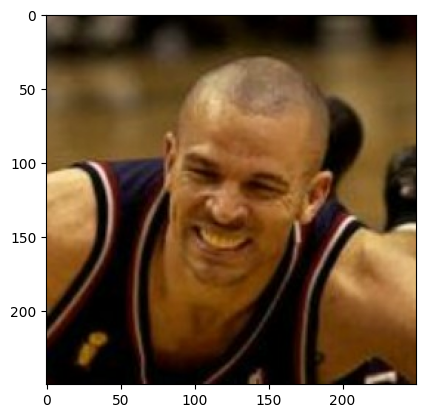

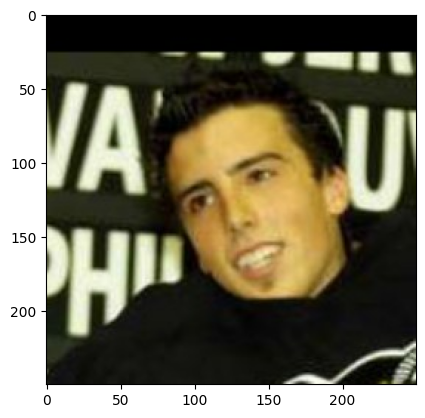

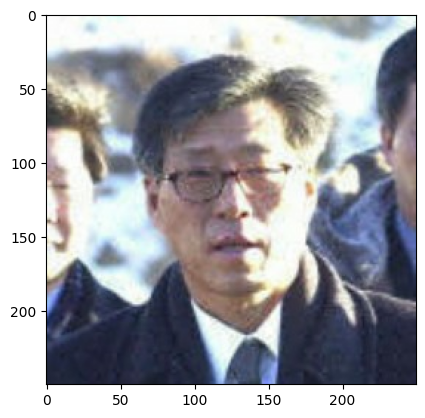

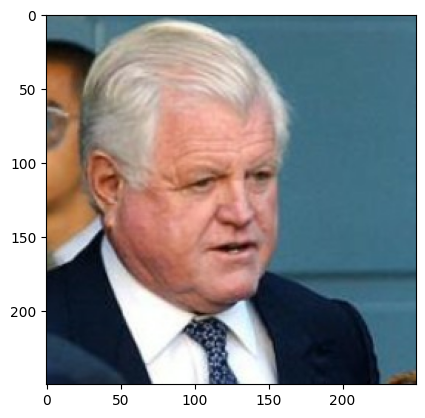

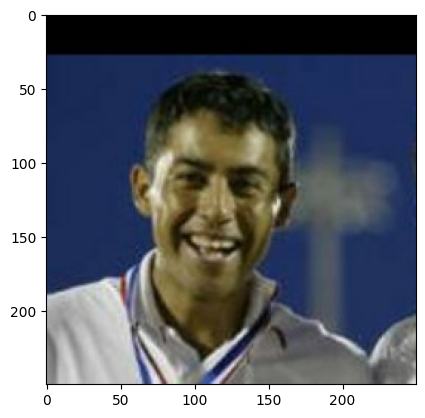

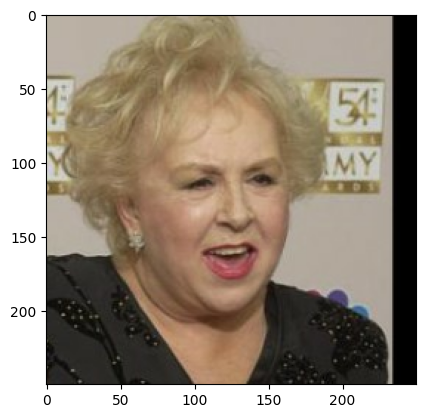

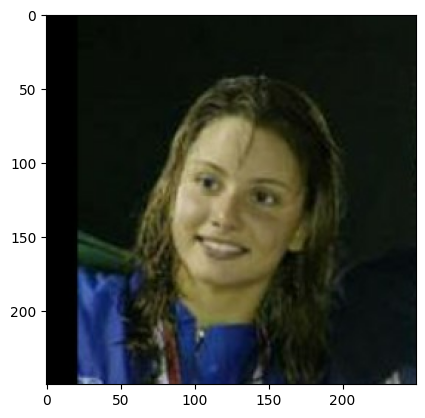

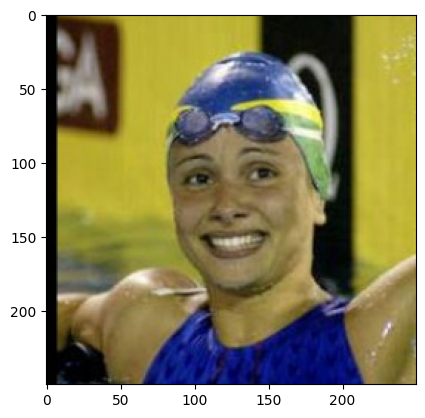

In [11]:
gt = []
pred = []

models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]

ds_test = ds['test'].batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

for x in ds['train'].take(50).as_numpy_iterator():
  try:
    pred.append(DeepFace.verify(x['img_0'], x['img_1'], model_name=models[3], enforce_detection=True)['verified'])
    gt.append(x['pair'])
  except:
    plt.imshow(x['img_0'])
    plt.show()
    plt.imshow(x['img_1'])

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(gt, pred))

0.5581395348837209


# Using Model Directly

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from deepface import DeepFace
from deepface.commons import functions
from deepface.detectors import DetectorWrapper

## Build face recognition model

In [32]:
model_name = "VGG-Face"

model = DeepFace.build_model(model_name=model_name).model

target_size = functions.find_target_size(model_name)

## Build face detection model

In [15]:
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'retinaface', 
  'mediapipe',
  'yolov8',
  'yunet',
  'fastmtcnn',
]
detect = DetectorWrapper.build_model(backends[3])

In [110]:
@tf.numpy_function(Tout=tf.float32)
def get_face(x):
  return DeepFace.extract_faces(x, detector_backend=backends[4], target_size=target_size)[0]['face']

@tf.function()
def normalize(img):
  return (img / 127.5) - 1

@tf.function()
def normalize_VGG(img):
  # return img
  r = tf.math.subtract(img[..., 0], 91.4953)
  g = tf.math.subtract(img[..., 1], 103.8827)
  b = tf.math.subtract(img[..., 2], 131.0912)
  return tf.stack([r, g, b], axis=2)

In [112]:
for x in ds['test'].take(50).as_numpy_iterator():
  # try:
    a = DeepFace.extract_faces(x['img_0'], detector_backend=backends[4], target_size=target_size)[0]['face']
    b = DeepFace.extract_faces(x['img_1'], detector_backend=backends[4], target_size=target_size)[0]['face']
    print(x['img_0'].dtype)
    plt.imshow(normalize_VGG(x['img_0']))
    plt.imshow(normalize_VGG(x['img_1']))
    break
  # except:
  #   if a is None:
  #     plt.imshow(x['img_0'])
  #     plt.show()
  #   else:
  #     plt.imshow(a)
  #     plt.show()
  #     plt.imshow(x['img_1'])
  #     plt.show()

uint8


TypeError: in user code:

    File "/tmp/ipykernel_247864/4007883328.py", line 12, in normalize_VGG  *
        r = tf.math.subtract(img[..., 0], 91.4953)

    TypeError: Expected uint8 passed to parameter 'y' of op 'Sub', got 91.4953 of type 'float' instead. Error: Expected uint8, but got 91.4953 of type 'float'.


## Find embeddings

In [90]:
BUFFER_SIZE=128
BATCH_SIZE=32

In [96]:
test_pairs = ds['test'].map(lambda x: {"img_0": normalize_VGG(get_face(x['img_0'])), "img_1": normalize_VGG(get_face(x['img_1'])), "pair": x['pair']})

In [97]:
test_batches = (
  test_pairs
  .cache()
  .shuffle(BUFFER_SIZE)
  .batch(BATCH_SIZE)
  # .map(lambda x: {"img_0": get_face(x['img_0']), "img_1": get_face(x['img_1']), "pair": x['pair']})
  .prefetch(buffer_size=tf.data.AUTOTUNE)
  )

2024-01-30 22:47:55.045400: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8736: Filling up shuffle buffer (this may take a while): 94 of 128
2024-01-30 22:47:58.736306: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


32


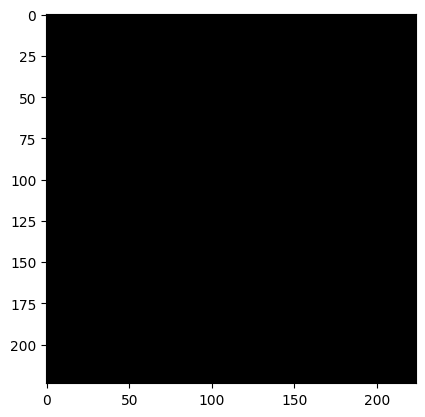

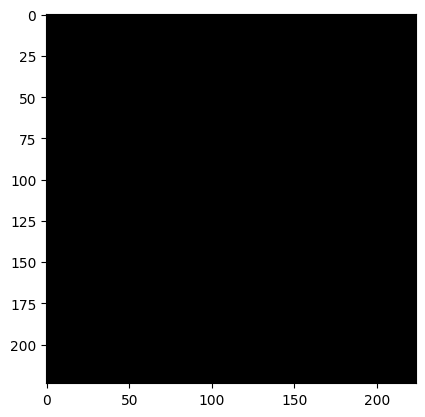

(64, 224, 224, 3)
2/2 [==============================] - 0s 71ms/step
(64, 4096)
(32, 4096)
(32,)
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
tf.Tensor(
[0.48606372 0.32160524 0.5666943  0.8192289  0.5442637  0.35629958
 0.67667544 0.2906602  0.55503887 0.56133324 0.13608277 0.26625547
 0.53673434 0.4366517  0.77881604 0.82144177 0.55151385 0.4660563
 0.98152226 0.5128435  0.659619   0.39687297 0.45028895 0.558828
 0.41378388 0.54511946 0.34765014 0.50507253 0.49767277 0.48234612
 0.40335333 0.7939862 ], shape=(32,), dtype=float32)
tf.Tensor([0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1], shape=(32,), dtype=int64)


2024-01-30 22:48:02.612281: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [103]:
for batch in test_batches:
  size = batch['pair'].shape[0]
  print(size)
  plt.imshow(batch['img_0'][0])
  plt.show()
  plt.imshow(batch['img_1'][0])
  plt.show()
  stacked = tf.concat([batch['img_0'], batch['img_1']], 0)
  print(stacked.shape)
  embeds = model.predict(stacked)
  print(embeds.shape)
  dist = tf.math.square(embeds[:size] - embeds[size:])
  print(dist.shape)
  eucl = tf.math.sqrt(tf.math.reduce_sum(dist, 1))
  print(eucl.shape)
  print(tf.where(eucl<1.17, 1, 0))
  print(eucl)
  print(batch['pair'])
  break

In [ ]:
img1 = DeepFace.extract_faces(img_path="dataset/img1.jpg", target_size=target_size)[0]["face"]
img1 = np.expand_dims(img1, axis=0)  # to (1, 224, 224, 3)
img1_representation = model.predict(img1)[0, :]

img2 = DeepFace.extract_faces(img_path="dataset/img3.jpg", target_size=target_size)[0]["face"]
img2 = np.expand_dims(img2, axis=0)
img2_representation = model.predict(img2)[0, :]


In [ ]:
# ----------------------------------------------
# distance between two images

distance_vector = np.square(img1_representation - img2_representation)
logger.debug(distance_vector)

distance = np.sqrt(distance_vector.sum())
logger.info(f"Euclidean distance: {distance}")

In [ ]:
# ----------------------------------------------
# expand vectors to be shown better in graph

img1_graph = []
img2_graph = []
distance_graph = []

for i in range(0, 200):
    img1_graph.append(img1_representation)
    img2_graph.append(img2_representation)
    distance_graph.append(distance_vector)

img1_graph = np.array(img1_graph)
img2_graph = np.array(img2_graph)
distance_graph = np.array(distance_graph)

In [ ]:
# ----------------------------------------------
# plotting

fig = plt.figure()

ax1 = fig.add_subplot(3, 2, 1)
plt.imshow(img1[0])
plt.axis("off")

ax2 = fig.add_subplot(3, 2, 2)
im = plt.imshow(img1_graph, interpolation="nearest", cmap=plt.cm.ocean)
plt.colorbar()

ax3 = fig.add_subplot(3, 2, 3)
plt.imshow(img2[0])
plt.axis("off")

ax4 = fig.add_subplot(3, 2, 4)
im = plt.imshow(img2_graph, interpolation="nearest", cmap=plt.cm.ocean)
plt.colorbar()

ax5 = fig.add_subplot(3, 2, 5)
plt.text(0.35, 0, f"Distance: {distance}")
plt.axis("off")

ax6 = fig.add_subplot(3, 2, 6)
im = plt.imshow(distance_graph, interpolation="nearest", cmap=plt.cm.ocean)
plt.colorbar()

plt.show()